# Unsupervised learning - PCA and clustering example notebook

## Exploring the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("countries.csv",index_col='Country')
df.head()



,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
Country,,,,,,,,,,,,,,,,,,,,
CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,53.038989,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628493,35.407690,44.935642,43.747235,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,27.095971,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,27.370720,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,29.112597,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


In [2]:
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 44 Number of features: 20


First, let us clean the data set ready for the analysis. We rename columns so that it is clearer what they represent.

In [3]:
d = {   'BX.KLT.DINV.WD.GD.ZS': 'FDI', 
        'EG.ELC.ACCS.ZS':'AccessElec',
        'EG.FEC.RNEW.ZS':'Renewable(%)', 
        'EN.ATM.CO2E.PC':'CO2', 
        'FP.CPI.TOTL.ZG':'CPI', 
        'IT.CEL.SETS.P2':'Cellphone',
       'IT.NET.USER.ZS': 'Internet(%)',
       'NE.EXP.GNFS.ZS': 'Exports(%)',
       'NE.IMP.GNFS.ZS': 'Imports(%)',
       'NY.GDP.PCAP.CD': 'GDP($)',
       'SP.DYN.AMRT.FE': 'MortalityFem',
       'SP.DYN.AMRT.MA': 'MortalityMale',
       'SP.DYN.CBRT.IN': 'BirthRate',
       'SP.DYN.CDRT.IN': 'DeathRate',
       'SP.DYN.IMRT.IN': 'MortalityInfant',
       'SP.DYN.LE00.IN': 'LifeExp',
       'SP.DYN.TFRT.IN': 'FertilityRate',
       'SP.POP.GROW': 'PopGrowth(%)',
       'SP.URB.TOTL.IN.ZS': 'UrbanPop(%)'}
df.rename(columns = d, inplace = True)
df.columns 

Index(['Country Groups', 'FDI', 'AccessElec', 'Renewable(%)', 'CO2', 'CPI',
       'Cellphone', 'Internet(%)', 'Exports(%)', 'Imports(%)', 'GDP($)',
       'MortalityFem', 'MortalityMale', 'BirthRate', 'DeathRate',
       'MortalityInfant', 'LifeExp', 'FertilityRate', 'PopGrowth(%)',
       'UrbanPop(%)'],
      dtype='object')

We then need to summarise the statistical properties of the columns:

In [4]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
FDI,3.39,2.11,0.27,11.56
AccessElec,76.63,26.00,23.09,100.00
Renewable(%),30.77,25.55,1.50,81.01
CO2,4.14,3.21,0.22,11.56
CPI,3.89,1.29,1.53,7.58
Cellphone,76.06,28.70,26.56,122.83
Internet(%),27.39,20.54,3.25,72.29
Exports(%),31.90,9.44,19.93,62.17
Imports(%),32.98,11.35,20.10,80.99
GDP($),8864.04,11163.53,522.03,39449.30


We also need to determine if we have any missing values, and which features these occur for:

In [5]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing


,missing
Country Groups,0
FDI,0
AccessElec,0
Renewable(%),0
CO2,0
CPI,2
Cellphone,0
Internet(%),0
Exports(%),0
Imports(%),0


It is often useful to determine the type of each variable. We see that we are working predominantly with continuous variables:

In [6]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, CEB to WLD
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Groups   44 non-null     object 
 1   FDI              44 non-null     float64
 2   AccessElec       44 non-null     float64
 3   Renewable(%)     44 non-null     float64
 4   CO2              44 non-null     float64
 5   CPI              42 non-null     float64
 6   Cellphone        44 non-null     float64
 7   Internet(%)      44 non-null     float64
 8   Exports(%)       44 non-null     float64
 9   Imports(%)       44 non-null     float64
 10  GDP($)           44 non-null     float64
 11  MortalityFem     44 non-null     float64
 12  MortalityMale    44 non-null     float64
 13  BirthRate        44 non-null     float64
 14  DeathRate        44 non-null     float64
 15  MortalityInfant  44 non-null     float64
 16  LifeExp          44 non-null     float64
 17  FertilityRate    44 

To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:
* Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

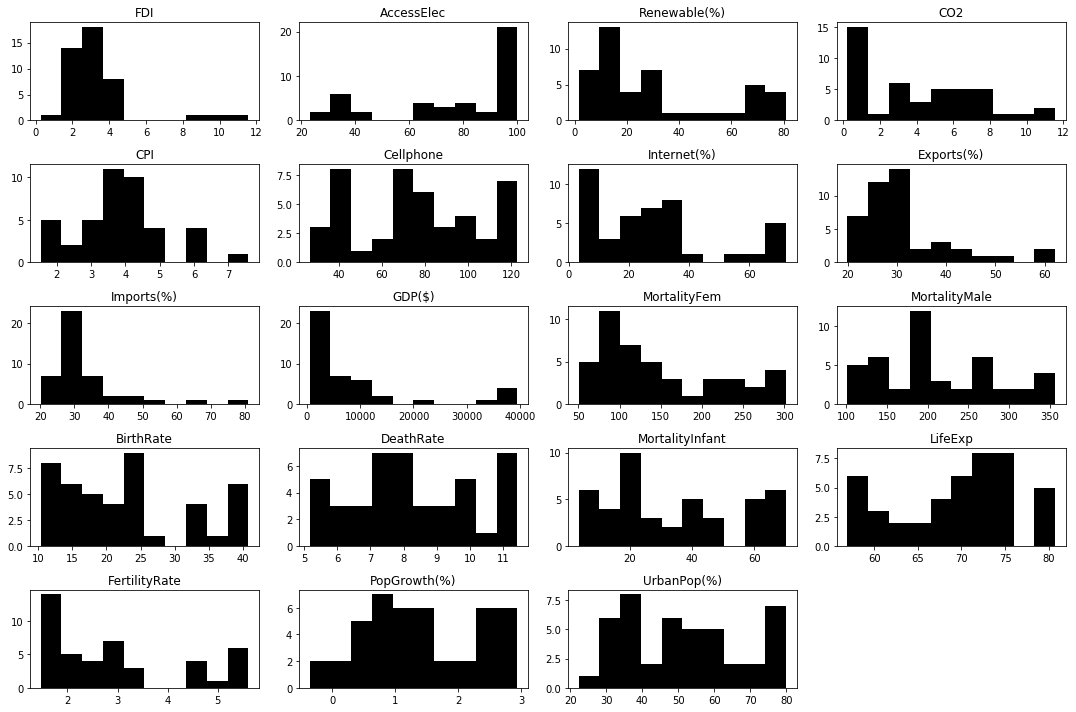

In [7]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()


We can compile the tabular information we have so far into a single dataframe:

In [8]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary




,missing,mean,std,min,max
Country Groups,0,nan,nan,nan,nan
FDI,0,3.39,2.11,0.27,11.56
AccessElec,0,76.63,26.00,23.09,100.00
Renewable(%),0,30.77,25.55,1.50,81.01
CO2,0,4.14,3.21,0.22,11.56
CPI,2,3.89,1.29,1.53,7.58
Cellphone,0,76.06,28.70,26.56,122.83
Internet(%),0,27.39,20.54,3.25,72.29
Exports(%),0,31.90,9.44,19.93,62.17
Imports(%),0,32.98,11.35,20.10,80.99


At first glance, the GDP per capita variable stands out as having a mean and standard deviation which is dramatically higher than the other variables. This makes sense as most of the other variables are percentages or ratios per 1000 people while GDP per Capita is in US$. This indicates that scaling the data will be useful to keep the GDP per capita from impacting the analysis disproportionately.

## Missing values - KNN imputation

The simplest way to handle missing values is to remove the affected row from the dataset. This can be done with the ```dropna``` function from Pandas. However, sometimes when there are a large number of missing values it would be detrimental to our machine learning algorithm to remove too many samples. In cases like this we can "impute" values (estimate given the other samples) to replace them. A simplistic version of this would be to use the ```fillna``` function and to compute the mean of the other samples. A slightly better approach might be to use KNN to estimate the value. KNN will investigate other observations with similar values to all the other variables. After the identification, it will get the mean of the consumer prices of these observations and impute the value as the value of consumer price for Bermuda.

In [9]:
from sklearn.impute import KNNImputer #You will need the scikit-learn version >= 0.22

X = df["CPI"].values.reshape(-1,1) # rehape because we are looking at a single feature
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
X_imputed = imputer.transform(X).squeeze()

comparison = pd.DataFrame(columns=["Original","Imputed"])
comparison["Original"] = df["CPI"].squeeze()
comparison["Imputed"] = X_imputed.squeeze()
print(comparison)


         Original  Imputed
Country                   
CEB          1.84     1.84
CSS          3.25     3.25
EAP          3.79     3.79
EAR          4.58     4.58
EAS          3.25     3.25
ECA          6.28     6.28
ECS          2.39     2.39
EMU          1.53     1.53
EUU          1.67     1.67
FCS          3.62     3.62
FSM           nan     3.89
HIC          1.96     1.96
HPC          4.70     4.70
IBD          4.34     4.34
IBT          4.41     4.41
IDA          4.55     4.55
IDB          3.44     3.44
IDX          5.05     5.05
LAC          3.86     3.86
LCN          3.56     3.56
LDC          5.98     5.98
LIC          3.67     3.67
LMC          6.00     6.00
LMY          4.46     4.46
LTE          3.29     3.29
MEA          3.91     3.91
MIC          4.58     4.58
MNA          3.99     3.99
OED          1.81     1.81
OSS          3.17     3.17
PRE          3.98     3.98
PSS           nan     3.89
PST          2.19     2.19
SSA          4.26     4.26
SSF          4.12     4.12
S

In [10]:
df["CPI"] = X_imputed #replace in dataframe

# Count missing values to check that there aren't any
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Country Groups,0
FDI,0
AccessElec,0
Renewable(%),0
CO2,0
CPI,0
Cellphone,0
Internet(%),0
Exports(%),0
Imports(%),0


## Correlation Analysis

Pandas offers a highly useful function, ``corr``, which allows us to compute correlations between the different columns. The standard correlation coefficient is the Pearson coefficient. It returns a matrix of values. It is often useful to visualise these as a plot. Both Pandas and Seaborn have functions for plotting correlation heatmaps, but Seaborn's offers more adjustabilty. We demonstrate the use of Seaborn's heatmap, using a mask to remove the top triangular half of correlations, as these are repeats.

In [11]:
countries = df.index
corr_df = df.drop(["Country Groups"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

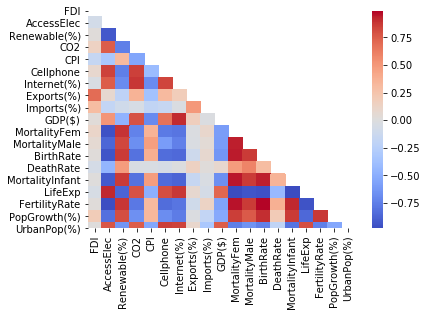

In [12]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")


In the plot, there is a linear correlation between strongly correlated variables: those coloured in either dark red or dark blue. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively correlated variables are blue: a decrease in one means an increase in the other.

From the correlation plot, it is evident that Foreign Direct Investment (FDI) has a relatively strong positive correlation to imports and exports. Access to electricity is positively correlated to cellphone subscriptions, internet usage, life expectancy and percentage of people who live in urban areas - as well as CO2 emissions! 

These correlations are intuitive as people who have electricity can use electronics such as phones, urban areas are more likely to have electricity than rural areas and, generally, countries with electricity access are more likely to have better healthcare, thereby increasing life expectancy. The predictors that have a strong negative correlation to electricity are the various mortality rates, the fertility rate and the percentage of renewable energy consumption. 

The last correlation is interesting as it seems to suggest that countries which have high access to electricity are less likely to use renewable energy. This may point to the fact that countries with high access to electricity historically haven’t needed to invest as heavily in renewable energy infrastructure as they can already provide for their countries’ electricity needs with their existing fossil fuels production techniques. 

There are other intuitive correlations such as population growth to fertility rates and birth rates. Overall, there are many variables that have strong negative and positive correlations with each other. This makes the data a good candidate for PCA. PCA will be able to reduce variables which encode similar types of differences between countries in a way that requires fewer dimensions.


## PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 



In [14]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

X = df.drop(["Country Groups"],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3703.63,-63.21,47.66,20.83,-14.68,-22.85,2.04,-6.84,3.12,8.28,-1.20,-4.01,-0.54,1.12,0.42,0.09,-0.03,0.05,-0.05
1,-137.42,-43.51,31.42,24.82,3.93,-5.92,13.86,-5.39,1.26,-5.42,8.31,1.30,1.40,-0.07,1.27,-0.22,-0.08,-0.08,0.02
2,-4856.02,-127.67,-26.32,-2.97,4.43,-4.95,1.11,-7.30,-4.94,-1.16,-1.46,-0.06,0.10,-0.16,-0.36,0.04,0.02,-0.03,0.01
3,-5937.49,-33.57,-3.18,-3.09,2.17,8.03,6.00,3.51,-0.99,-2.60,-0.84,0.04,-1.82,-0.30,1.02,0.76,0.14,-0.01,-0.01
4,-1188.89,-112.54,-25.93,-0.85,3.97,-3.77,0.11,-5.98,-4.43,0.78,-1.53,-0.45,-0.20,0.34,0.16,0.16,-0.08,0.02,0.03


In [15]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [1.12e+04 9.02e+01 2.74e+01 1.52e+01 1.12e+01 8.52e+00 6.47e+00 4.84e+00
 3.65e+00 2.76e+00 2.48e+00 1.88e+00 9.17e-01 6.75e-01 4.64e-01 2.81e-01
 7.33e-02 5.75e-02 3.73e-02]


In [16]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [1.00e+00 6.53e-05 6.01e-06 1.85e-06 1.00e-06 5.82e-07 3.36e-07 1.88e-07
 1.07e-07 6.12e-08 4.95e-08 2.82e-08 6.75e-09 3.65e-09 1.73e-09 6.32e-10
 4.31e-11 2.65e-11 1.12e-11]


In [17]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08
 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08 1.25e+08
 1.25e+08 1.25e+08 1.25e+08]


In [18]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = countries[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

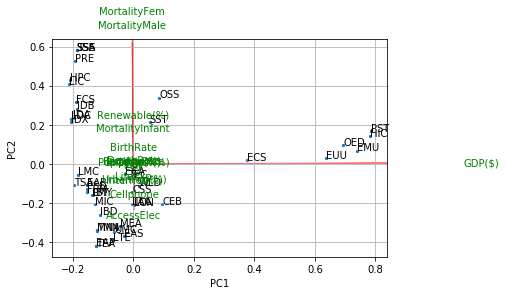

In [19]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(countries))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that GDP and the mortality rates for males and females are the most important featuresas the arrows to each of these dominate the biplot.

This information can also be quantified as follows:

In [20]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,FDI,0.000,0.003
1,AccessElec,0.001,0.229
2,Renewable(%),0.001,0.219
3,CO2,0.000,0.011
4,CPI,0.000,0.000
5,Cellphone,0.002,0.135
6,Internet(%),0.002,0.069
7,Exports(%),0.000,0.008
8,Imports(%),0.000,0.010
9,GDP($),1.000,0.006



We see that the GDP has by far the highest importance in the first principle component, while several features are relatively important for the second component: mortality for males and females being the most important at around 0.6 These observations agree with those deduced from the biplot. If we refer to our summarised statistics from earlier on, the mean values for these features are much larger numbers than those for the other features. It is possible that because of this, these features 'swamp' the others, which results in them being ignored.

### Standardised data

We standardise the data so that some features do not swamp the others.

In [21]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3.979,2.361,-0.298,2.163,1.599,1.138,0.652,1.054,0.751,-0.248,0.120,-0.236,0.271,0.009,0.089,0.009,-0.017,-0.021,-0.004
1,-2.292,1.472,1.289,0.155,0.877,0.458,0.343,-0.523,-0.462,-0.495,0.998,0.160,-0.158,-0.124,-0.090,0.056,0.011,0.005,-0.010
2,-1.860,-1.020,0.991,-0.177,-0.074,-0.418,1.006,0.000,-0.016,-0.245,-0.199,-0.022,-0.059,0.100,-0.042,-0.004,0.010,0.004,0.003
3,0.772,-1.474,0.546,-0.146,0.045,0.279,0.250,-0.118,0.111,0.262,0.179,-0.063,-0.226,-0.117,0.193,-0.054,0.042,0.011,0.020
4,-2.365,-0.774,0.667,0.160,-0.298,-0.057,0.938,-0.080,0.052,-0.217,-0.144,-0.150,-0.006,0.044,0.033,-0.011,0.003,0.017,-0.012


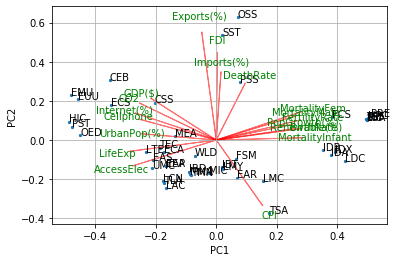

In [22]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.

In [23]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,FDI,0.003,0.444
1,AccessElec,0.273,0.131
2,Renewable(%),0.258,0.058
3,CO2,0.251,0.187
4,CPI,0.152,0.332
5,Cellphone,0.253,0.106
6,Internet(%),0.265,0.137
7,Exports(%),0.048,0.549
8,Imports(%),0.015,0.345
9,GDP($),0.214,0.212


Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, with only some with low importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

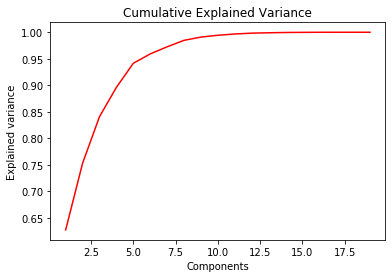

In [24]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

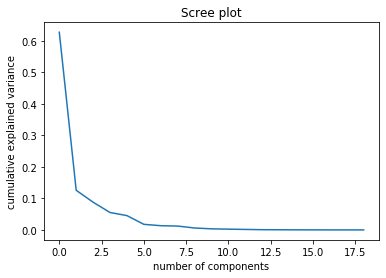

In [25]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 5 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 19 variables and now we have 5 variables explaining most of the variability. 


In [26]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2,3,4
Country,,,,,
CEB,-3.979,2.361,-0.298,2.163,1.599
CSS,-2.292,1.472,1.289,0.155,0.877
EAP,-1.860,-1.020,0.991,-0.177,-0.074
EAR,0.772,-1.474,0.546,-0.146,0.045
EAS,-2.365,-0.774,0.667,0.160,-0.298


## Hierarchical clustering


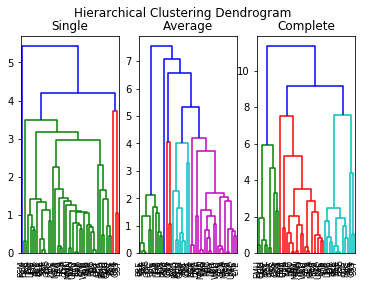

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

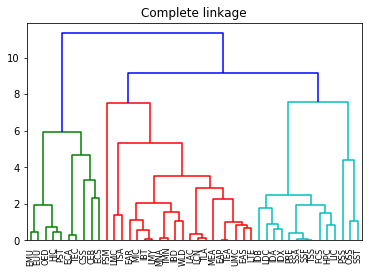

In [28]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.


No handles with labels found to put in legend.


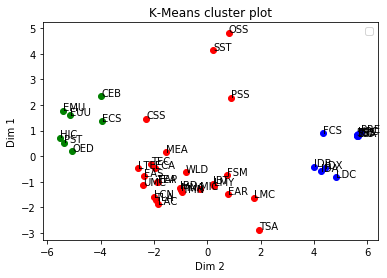

In [29]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = countries[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [30]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(countries)[group0_indices]
group1 = np.array(countries)[group1_indices]
group2 = np.array(countries)[group2_indices]


print("Group 0: {}\n\n".format([df.loc[x]["Country Groups"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["Country Groups"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["Country Groups"] for x in group2]))



Group 0: ['Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Micronesia, Fed. Sts.', 'IBRD only', 'IDA & IBRD total', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)', 'Other small states', 'Pacific island small states', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)', 'Upper middle income', 'World']


Group 1: ['Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'IDA total', 'IDA blend', 'IDA only', 'Least developed countries: UN c